<a href="https://colab.research.google.com/github/anomaitech/GeoApp/blob/main/C3_Overlays_and_Clipping_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geodatasets

In [3]:
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import box
import geodatasets

In [64]:
chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))
groceries = geopandas.read_file(geodatasets.get_path("geoda.groceries")).to_crs(chicago.crs)

# Create a subset of the chicago data that is just the South American continent
near_west_side = chicago[chicago["community"] == "NEAR WEST SIDE"]

# Create a custom polygon
polygon = box(-87.8, 41.90, -87.5, 42)
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=chicago.crs)

In [46]:
groceries

,OBJECTID,Ycoord,Xcoord,Status,Address,Chain,Category,geometry
0,16,41.973266,-87.657073,OPEN,"1051 W ARGYLE ST, CHICAGO, IL. 60640",VIET HOA PLAZA,None,MULTIPOINT (-87.65661 41.97321)
1,18,41.696367,-87.681315,OPEN,"10800 S WESTERN AVE, CHICAGO, IL. 60643-3226",COUNTY FAIR FOODS,None,MULTIPOINT (-87.68136 41.69713)
2,22,41.868634,-87.638638,OPEN,"1101 S CANAL ST, CHICAGO, IL. 60607-4932",WHOLE FOODS MARKET,None,MULTIPOINT (-87.63918 41.86847)
3,23,41.877590,-87.654953,OPEN,"1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905",TARGET/SUPER,new,MULTIPOINT (-87.65495 41.87783)
4,27,41.737696,-87.625795,OPEN,"112 W 87TH ST, CHICAGO, IL. 60620-1318",FOOD 4 LESS,None,MULTIPOINT (-87.62715 41.73623)
...,...,...,...,...,...,...,...,...
143,585,41.880834,-87.647729,Chicago-West Loop,"40 S Halsted St, Chicago, IL 60661",Mariano's,None,MULTIPOINT (-87.64732 41.88063)
144,586,41.920842,-87.669112,NewLocation,"2112 N Ashland Ave, Chicago IL 60614",Mariano's,None,MULTIPOINT (-87.66839 41.92006)
145,587,41.835930,-87.664034,Chicago-Bridgeport,"3145 S Ashland Ave, Chicago, IL 60608",Mariano's,None,MULTIPOINT (-87.6657 41.83613)
146,588,41.859370,-87.630062,Chicago-South Loop,"1615 S Clark St, Chicago, IL 60616",Mariano's,None,MULTIPOINT (-87.63024 41.85961)


In [10]:
chicago[chicago['NID']==35]

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."


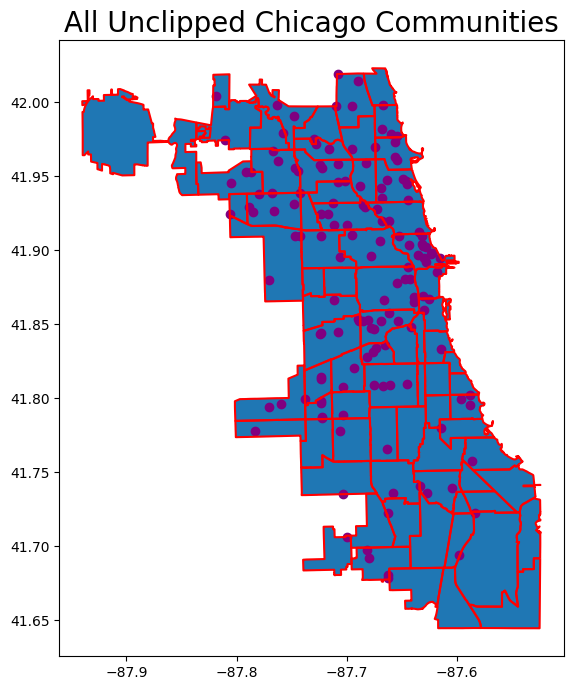

In [24]:
fig = plt.figure(figsize=(12, 8))  # Create a figure object
ax1 = plt.axes() # or  ax1 = fig.add_subplot(111)  # Create an axes object
# ax1 = fig.add_subplot(111)  # Create an axes object

chicago.plot(ax=ax1)
chicago.boundary.plot(ax=ax1, color="red")
groceries.plot(ax=ax1, color="purple")
ax1.set_title("All Unclipped Chicago Communities", fontsize=20)

plt.show()


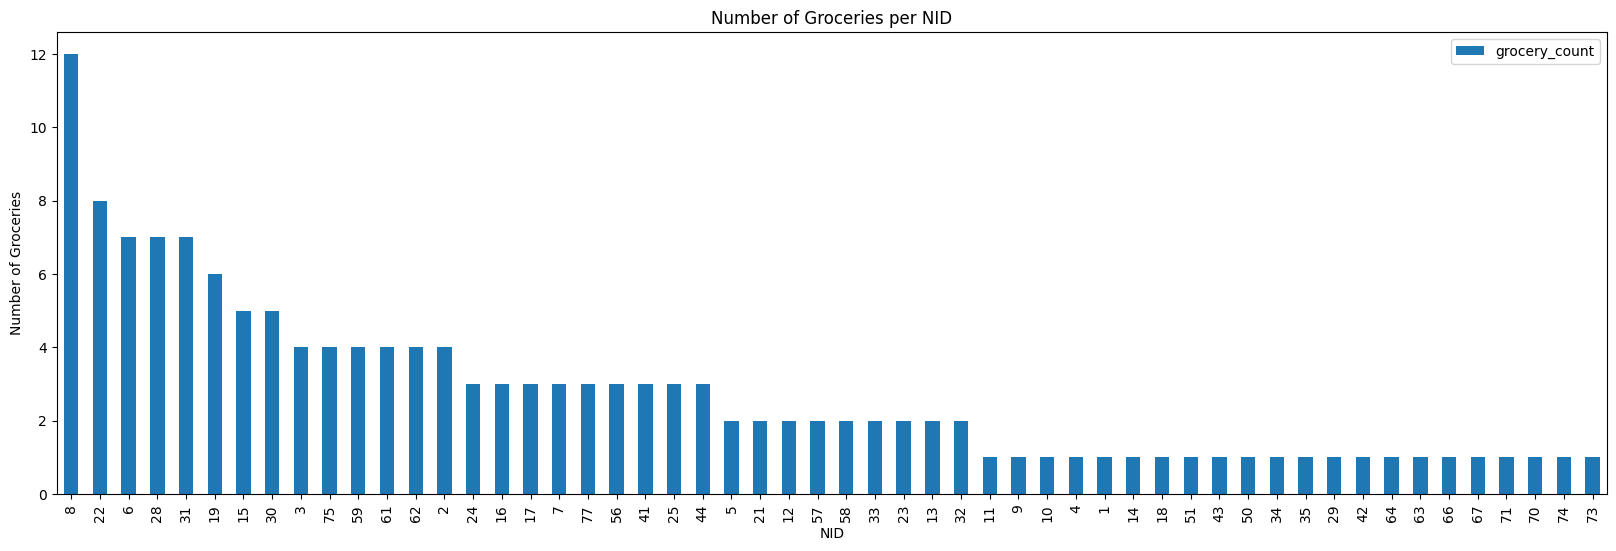

In [29]:


import pandas as pd



# Spatial join to associate groceries with NIDs
groceries_in_chicago = geopandas.sjoin(groceries, chicago, how="inner", predicate="intersects")

# Group by NID and count the number of groceries
groceries_per_nid = groceries_in_chicago.groupby("NID")["index_right"].count().reset_index()
groceries_per_nid.rename(columns={"index_right": "grocery_count"}, inplace=True)

# Print or further process the result
groceries_per_nid.sort_values(by="grocery_count", ascending=False, inplace=True)

groceries_per_nid.plot(kind='bar', x='NID', y='grocery_count', figsize=(20, 6))
plt.xlabel("NID")
plt.ylabel("Number of Groceries")
plt.title("Number of Groceries per NID")
plt.show()



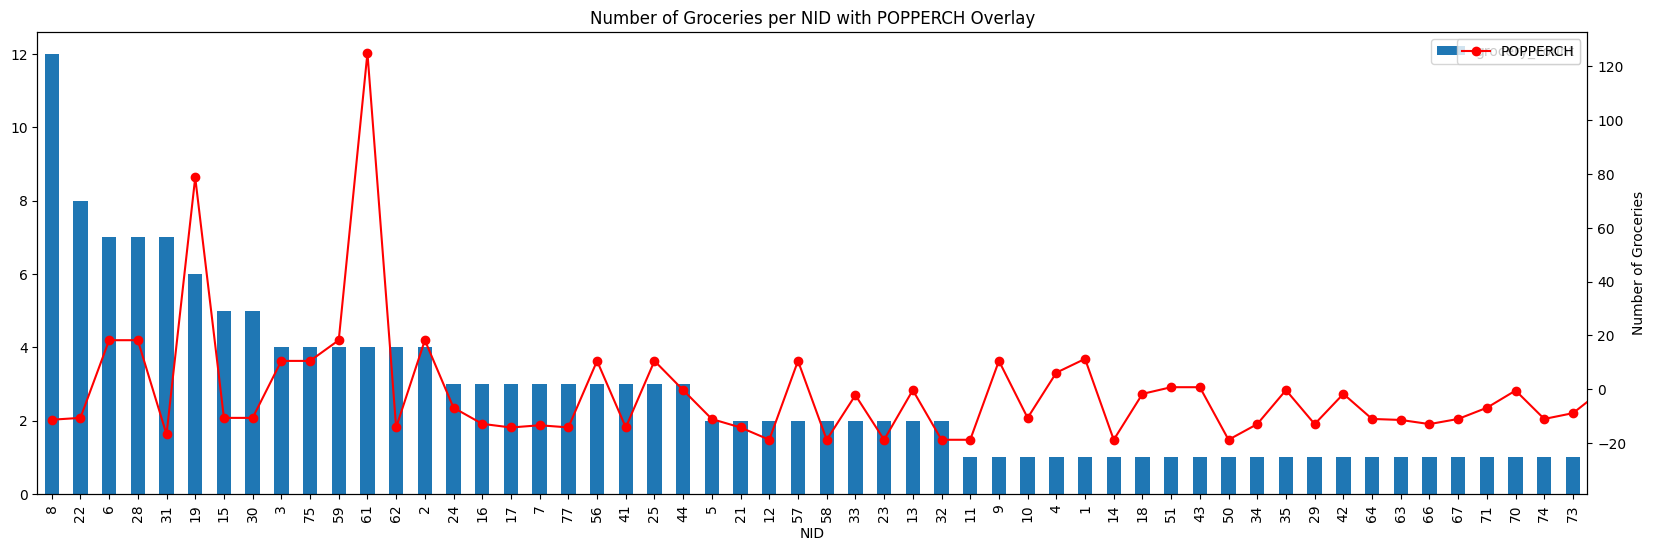

In [31]:

import matplotlib.pyplot as plt

POPPERCH = groceries_in_chicago['POPPERCH']

# Assuming groceries_per_nid has an 'NID' column and a 'grocery_count' column

# Create the bar plot for groceries_per_nid
ax = groceries_per_nid.plot(kind='bar', x='NID', y='grocery_count', figsize=(20, 6))

# Plot POPPERCH data on top of the bar plot
ax2 = ax.twinx()  # Create a second y-axis
ax2.plot(POPPERCH.index, POPPERCH.values, marker='o', linestyle='-', color='red', label='POPPERCH')

# Set labels and title for the second y-axis
ax2.set_ylabel('POPPERCH')
ax2.legend(loc='upper right')

plt.xlabel("NID")
plt.ylabel("Number of Groceries")
plt.title("Number of Groceries per NID with POPPERCH Overlay")

plt.show()


In [47]:
groceries_in_chicago.head()

,OBJECTID,Ycoord,Xcoord,Status,Address,Chain,Category,geometry,index_right,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg
0,16,41.973266,-87.657073,OPEN,"1051 W ARGYLE ST, CHICAGO, IL. 60640",VIET HOA PLAZA,None,MULTIPOINT (-87.65661 41.97321),30,UPTOWN,3,56362,63551,-7189,-11.312174,0,1
1,18,41.696367,-87.681315,OPEN,"10800 S WESTERN AVE, CHICAGO, IL. 60643-3226",COUNTY FAIR FOODS,None,MULTIPOINT (-87.68136 41.69713),73,MORGAN PARK,75,22544,25226,-2682,-10.631888,0,1
2,22,41.868634,-87.638638,OPEN,"1101 S CANAL ST, CHICAGO, IL. 60607-4932",WHOLE FOODS MARKET,None,MULTIPOINT (-87.63918 41.86847),28,NEAR WEST SIDE,28,54881,46419,8462,18.229604,1,0
3,23,41.877590,-87.654953,OPEN,"1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905",TARGET/SUPER,new,MULTIPOINT (-87.65495 41.87783),28,NEAR WEST SIDE,28,54881,46419,8462,18.229604,1,0
4,27,41.737696,-87.625795,OPEN,"112 W 87TH ST, CHICAGO, IL. 60620-1318",FOOD 4 LESS,None,MULTIPOINT (-87.62715 41.73623),39,CHATHAM,44,31028,37275,-6247,-16.759222,0,1


<ipython-input-32-3465b9f076e8>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['grocery_count'].fillna(0, inplace=True)


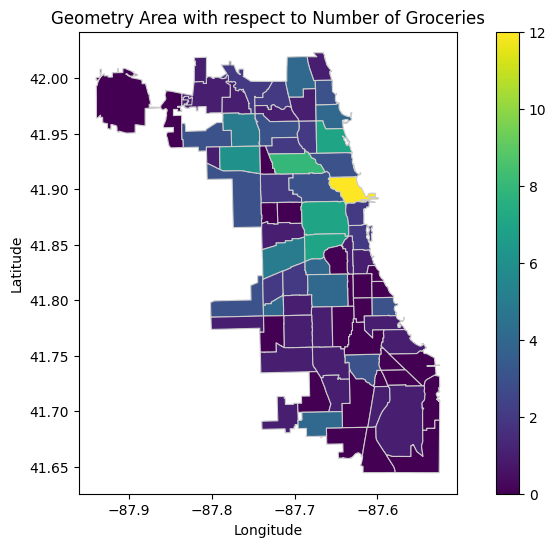

In [32]:

# Merge the data based on NID to see if
merged_data = chicago.merge(groceries_per_nid, on='NID', how='left')

# Fill NaN values in 'grocery_count' with 0 (if any)
merged_data['grocery_count'].fillna(0, inplace=True)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_data.plot(column='grocery_count', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and labels
ax.set_title('Geometry Area with respect to Number of Groceries')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


In [49]:
positive_population_growth=groceries_in_chicago[groceries_in_chicago['POPPERCH']>10]

<Axes: >

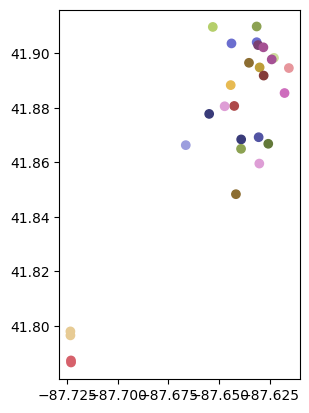

In [53]:
positive_population_growth.plot(cmap="tab20b")

In [56]:
groceries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [57]:
groceries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

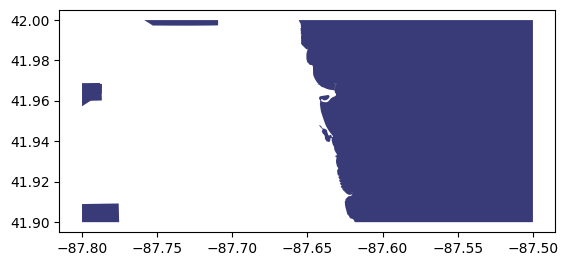

In [77]:

newdf = poly_gdf.overlay(chicago, how="difference")
newdf.plot(cmap="tab20b")


In [87]:

from shapely.geometry import box, Polygon

minx, miny, maxx, maxy = chicago.total_bounds

# Create a polygon from the bounding box
chicago_bbox_polygon = Polygon([(minx, miny), (maxx, miny), (maxx, maxy), (minx, maxy)])

# Print the polygon coordinates (optional)
print(f"Chicago bounding box polygon: {chicago_bbox_polygon}")


chicago_bbox_gdf = geopandas.GeoDataFrame(index=[0], crs=chicago.crs, geometry=[chicago_bbox_polygon])




Chicago bounding box polygon: POLYGON ((-87.94011408252346 41.64454312150605, -87.52413710389521 41.64454312150605, -87.52413710389521 42.02303858614758, -87.94011408252346 42.02303858614758, -87.94011408252346 41.64454312150605))


<Axes: >

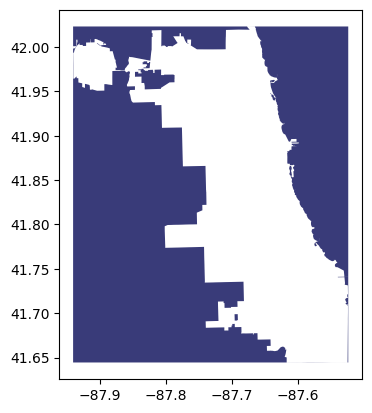

In [99]:
newdf2 = chicago.overlay(chicago_bbox_gdf, how="symmetric_difference")
newdf2.plot(cmap="tab20b")